# Presidents, Jobs, Violent Crime, and Moral Panics

In [67]:
#imports
import pandas as pd
import os
from collections import Counter
import nltk
from nltk.draw.dispersion import dispersion_plot
import string
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
import image
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,7)

In [3]:
#set paths
path = r"C:/Users/bpeake/Documents/SoU/SoU"
dirs1 = os.listdir(path)

In [4]:
dirs1

['Bush_1989.txt',
 'Bush_1990.txt',
 'Bush_1991.txt',
 'Bush_1992.txt',
 'Bush_2001.txt',
 'Bush_2002.txt',
 'Bush_2003.txt',
 'Bush_2004.txt',
 'Bush_2005.txt',
 'Bush_2006.txt',
 'Bush_2007.txt',
 'Bush_2008.txt',
 'Clinton_1993.txt',
 'Clinton_1994.txt',
 'Clinton_1995.txt',
 'Clinton_1996.txt',
 'Clinton_1997.txt',
 'Clinton_1998.txt',
 'Clinton_1999.txt',
 'Clinton_2000.txt',
 'Obama_2009.txt',
 'Obama_2010.txt',
 'Obama_2011.txt',
 'Obama_2012.txt',
 'Obama_2013.txt',
 'Obama_2014.txt',
 'Obama_2015.txt',
 'Obama_2016.txt',
 'Reagan_1982.txt',
 'Reagan_1983.txt',
 'Reagan_1984.txt',
 'Reagan_1985.txt',
 'Reagan_1986.txt',
 'Reagan_1987.txt',
 'Reagan_1988.txt',
 'Trump_2017.txt']

# Jobs

In [5]:
#create function to count "job" in a given text file in the directory. 
#I always call this sesame street in honor of my original love: CountVectorizer (aH, aH, aH)
#You should probably call it something normal if you replicate it...
def sesame_street(word, filename):
    file = open(path + "/" + filename, encoding= "utf8")
    text = file.read().lower()
    words = nltk.word_tokenize(text)
    word_counter = Counter(words)
    word_count = word_counter[word]
    return word_count

In [6]:
# create a list of dictionaries to build the pd DataFrame
job_dict_list = []
for filename in dirs1:
    job_dict = {}
    job_word_count = sesame_street("job", filename) + sesame_street("jobs", filename)
    # I tried this with target from NLTK - anyone have any suggestions for how to get that to work? 
    job_dict["year"] = int(filename[-8:-4])
    job_dict["job_word_count"] = job_word_count
    job_dict_list.append(job_dict)
print(job_dict_list)

[{'year': 1989, 'job_word_count': 5}, {'year': 1990, 'job_word_count': 3}, {'year': 1991, 'job_word_count': 5}, {'year': 1992, 'job_word_count': 11}, {'year': 2001, 'job_word_count': 4}, {'year': 2002, 'job_word_count': 13}, {'year': 2003, 'job_word_count': 4}, {'year': 2004, 'job_word_count': 13}, {'year': 2005, 'job_word_count': 6}, {'year': 2006, 'job_word_count': 7}, {'year': 2007, 'job_word_count': 6}, {'year': 2008, 'job_word_count': 6}, {'year': 1993, 'job_word_count': 25}, {'year': 1994, 'job_word_count': 30}, {'year': 1995, 'job_word_count': 19}, {'year': 1996, 'job_word_count': 14}, {'year': 1997, 'job_word_count': 14}, {'year': 1998, 'job_word_count': 16}, {'year': 1999, 'job_word_count': 8}, {'year': 2000, 'job_word_count': 10}, {'year': 2009, 'job_word_count': 18}, {'year': 2010, 'job_word_count': 29}, {'year': 2011, 'job_word_count': 31}, {'year': 2012, 'job_word_count': 42}, {'year': 2013, 'job_word_count': 43}, {'year': 2014, 'job_word_count': 37}, {'year': 2015, 'job_w

In [7]:
#create the dataframe out of the dict
job_talk = pd.DataFrame(job_dict_list)
job_talk.set_index("year", inplace = True)
job_talk.columns = ["job"]
job_talk.sort_index(inplace = True)
job_talk.head()

,job
year,
1982,8
1983,15
1984,5
1985,10
1986,1


<Container object of 36 artists>

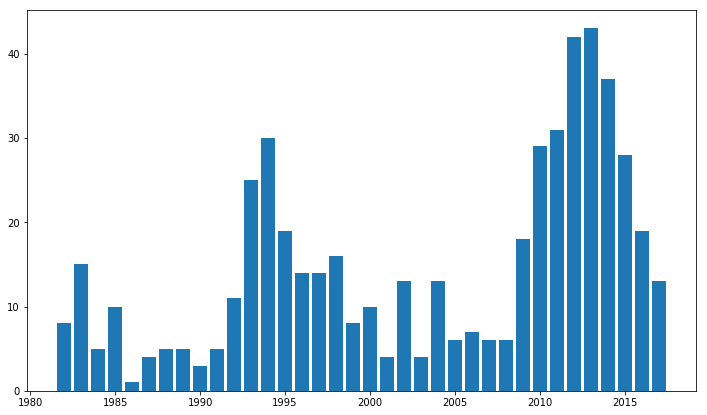

In [8]:
#plot the data
years = job_talk.index
job = job_talk["job"].values
plt.bar(years, job)

In [9]:
#Create a data frame using unemployment data
unemployment = pd.read_csv("C:/Users/bpeake/Documents/SoU/unemployment_rate.csv")
unemployment.set_index("Year", inplace = True)
unemployment["annual"] = unemployment.mean(axis = 1)
unemployment.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,annual
Year,,,,,,,,,,,,,
1982,8.6,8.9,9.0,9.3,9.4,9.6,9.8,9.8,10.1,10.4,10.8,10.8,9.708333
1983,10.4,10.4,10.3,10.2,10.1,10.1,9.4,9.5,9.2,8.8,8.5,8.3,9.600000
1984,8.0,7.8,7.8,7.7,7.4,7.2,7.5,7.5,7.3,7.4,7.2,7.3,7.508333
1985,7.3,7.2,7.2,7.3,7.2,7.4,7.4,7.1,7.1,7.1,7.0,7.0,7.191667
1986,6.7,7.2,7.2,7.1,7.2,7.2,7.0,6.9,7.0,7.0,6.9,6.6,7.000000


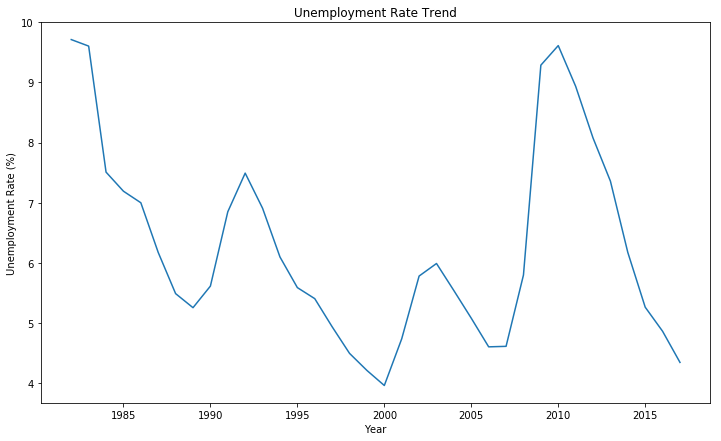

In [10]:
#plot the unemployment trend
years = unemployment.index
joblessness = unemployment["annual"].values
plt.plot(years, joblessness)
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.title("Unemployment Rate Trend")

In [11]:
#Big DF so far...
job_data = pd.merge(unemployment, job_talk, left_index = True, right_index = True)
job_data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,annual,job
Year,,,,,,,,,,,,,,
1982,8.6,8.9,9.0,9.3,9.4,9.6,9.8,9.8,10.1,10.4,10.8,10.8,9.708333,8
1983,10.4,10.4,10.3,10.2,10.1,10.1,9.4,9.5,9.2,8.8,8.5,8.3,9.600000,15
1984,8.0,7.8,7.8,7.7,7.4,7.2,7.5,7.5,7.3,7.4,7.2,7.3,7.508333,5
1985,7.3,7.2,7.2,7.3,7.2,7.4,7.4,7.1,7.1,7.1,7.0,7.0,7.191667,10
1986,6.7,7.2,7.2,7.1,7.2,7.2,7.0,6.9,7.0,7.0,6.9,6.6,7.000000,1


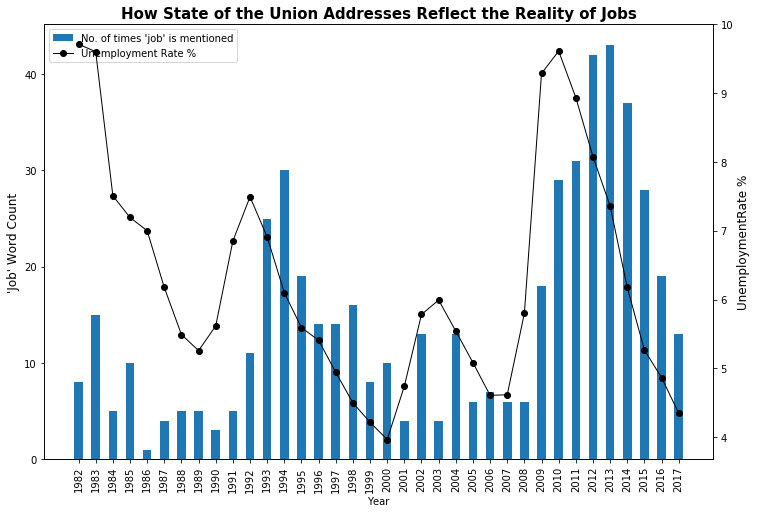

In [12]:
#plot it together!
fig, ax1 = plt.subplots(figsize = (12,8))
job_data["job"].plot(kind = "bar", stacked = False, ax = ax1, label = "No. of times 'job' is mentioned")
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), job_data["annual"].values, linestyle = "-", marker = "o", color = "k", 
         linewidth = 1.0, label = "Unemployment Rate %")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc = "best")

ax1.set_title("How State of the Union Addresses Reflect the Reality of Jobs", fontweight = "bold", size = 15)
ax1.set_ylabel("'Job' Word Count", fontsize = 12)
ax2.set_ylabel("UnemploymentRate %", fontsize = 12)


# Crime

import nltk
crime_dict_list = []
for file in dirs1:
    crime_dict = {}
    crime_word_count = sesame_street(file.startswith("violen"), filename) + sesame_street(file.startswith("crim"), filename)
    crime_dict["year"] = int(file[-8:-4])
    crime_dict["crime_word_count"] = crime_word_count
    crime_dict_list.append(crime_dict)
print(crime_dict_list)

In [17]:
#Let's think about crime, now
crime_dict_list = []
for filename in dirs1:
    crime_dict = {}
    crime_word_count = sesame_street("violent", filename) + sesame_street("violence", filename) + sesame_street("crime", filename) + sesame_street("criminal", filename) + sesame_street("crimes", filename)
    crime_dict["year"] = int(filename[-8:-4])
    crime_dict["crime_word_count"] = crime_word_count
    crime_dict_list.append(crime_dict)
print(crime_dict_list)

[{'year': 1989, 'crime_word_count': 1}, {'year': 1990, 'crime_word_count': 1}, {'year': 1991, 'crime_word_count': 5}, {'year': 1992, 'crime_word_count': 5}, {'year': 2001, 'crime_word_count': 1}, {'year': 2002, 'crime_word_count': 1}, {'year': 2003, 'crime_word_count': 1}, {'year': 2004, 'crime_word_count': 5}, {'year': 2005, 'crime_word_count': 3}, {'year': 2006, 'crime_word_count': 6}, {'year': 2007, 'crime_word_count': 4}, {'year': 2008, 'crime_word_count': 5}, {'year': 1993, 'crime_word_count': 3}, {'year': 1994, 'crime_word_count': 33}, {'year': 1995, 'crime_word_count': 14}, {'year': 1996, 'crime_word_count': 22}, {'year': 1997, 'crime_word_count': 5}, {'year': 1998, 'crime_word_count': 8}, {'year': 1999, 'crime_word_count': 12}, {'year': 2000, 'crime_word_count': 9}, {'year': 2009, 'crime_word_count': 0}, {'year': 2010, 'crime_word_count': 1}, {'year': 2011, 'crime_word_count': 2}, {'year': 2012, 'crime_word_count': 2}, {'year': 2013, 'crime_word_count': 8}, {'year': 2014, 'crim

In [18]:
#turn it into a dataframe
crime_talk = pd.DataFrame(crime_dict_list)
crime_talk.set_index("year", inplace = True)
crime_talk.columns = ["violent_talk"]
crime_talk.sort_index(inplace = True)
crime_talk.describe()

,violent_talk
count,36.000000
mean,5.305556
std,6.501953
min,0.000000
25%,1.000000
50%,3.500000
75%,6.250000
max,33.000000


<Container object of 36 artists>

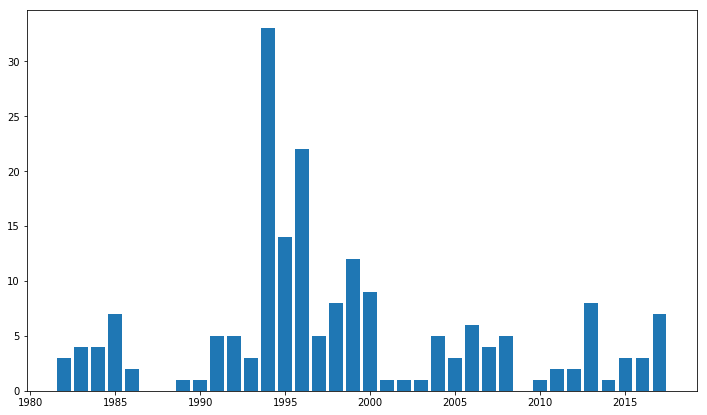

In [19]:
#plot that moral panic!
years = crime_talk.index
crime = crime_talk["violent_talk"].values
plt.bar(years, crime)

In [21]:
#Create a data frame using crime stats, based on data by OEM, filled in with 2017 estimates from the Brennan Center for Justice
crime = pd.read_excel("C:/Users/bpeake/Documents/SoU/crime_rate_100.xlsx")
crime.set_index("Year", inplace = True)
crime.index.astype(int)
crime.columns = ["Violent", "Property"]
violent = crime["Violent"]

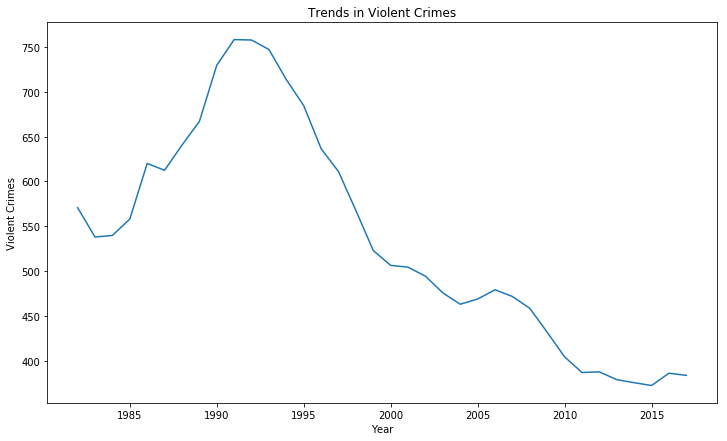

In [22]:
#plot violent crime trend
date = violent.index
vcrime = violent.values
plt.plot(date, vcrime)
plt.xlabel("Year")
plt.ylabel("Violent Crimes")
plt.title("Trends in Violent Crimes")

In [23]:
#Merge 'em
crime_data = pd.DataFrame.join(crime_talk, violent)
crime_data.tail()

,violent_talk,Violent
year,,
2013,8,379.1
2014,1,375.7
2015,3,372.6
2016,3,386.3
2017,7,383.9


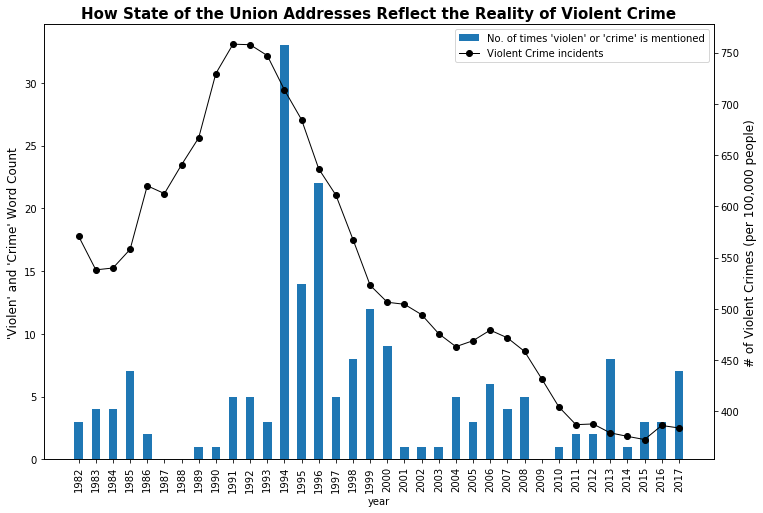

In [24]:
#violent crime talk to violent crime rate
fig, ax1 = plt.subplots(figsize = (12,8))
crime_data["violent_talk"].plot(kind = "bar", stacked = False, ax = ax1, label = "No. of times 'violen' or 'crime' is mentioned")
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), crime_data["Violent"].values, linestyle = "-", marker = "o", color = "k", 
         linewidth = 1.0, label = "Violent Crime incidents")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc = "best")

ax1.set_title("How State of the Union Addresses Reflect the Reality of Violent Crime", fontweight = "bold", size = 15)
ax1.set_ylabel("'Violen' and 'Crime' Word Count", fontsize = 12)
ax2.set_ylabel("# of Violent Crimes (per 100,000 people)", fontsize = 12)


In [33]:
#create crime total column
crime["Total"] = crime.Violent + crime.Property

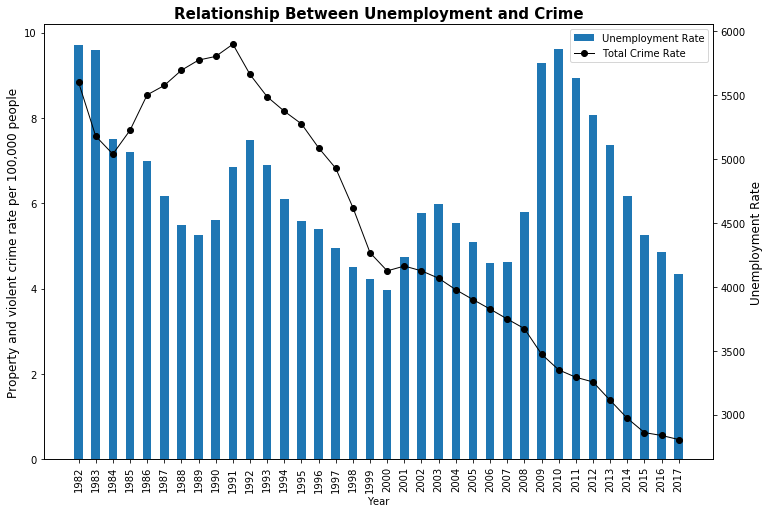

In [35]:
#plot
fig, ax1 = plt.subplots(figsize = (12,8))
job_data["annual"].plot(kind = "bar", stacked = False, ax = ax1, label = "Unemployment Rate")
ax2 = ax1.twinx()
ax2.plot(ax1.get_xticks(), crime["Total"].values, linestyle = "-", marker = "o", color = "k", 
         linewidth = 1.0, label = "Total Crime Rate")

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc = "best")

ax1.set_title("Relationship Between Unemployment and Crime", fontweight = "bold", size = 15)
ax1.set_ylabel("Property and violent crime rate per 100,000 people", fontsize = 12)
ax2.set_ylabel("Unemployment Rate", fontsize = 12)

# When do presidents talk about crime and jobs? 

Let's look at how Republican presidents have talked about five topics
- immigration
- taxes
- peace
- crime
- jobs
- education
- oil


In [36]:
import nltk
from nltk.corpus import PlaintextCorpusReader as pcr
path = "C:/Users/bpeake/Documents/SoU/SoU"
files = ".*.txt"
corpora = pcr(path, files)
corpora.fileids()

['Bush_1989.txt',
 'Bush_1990.txt',
 'Bush_1991.txt',
 'Bush_1992.txt',
 'Bush_2001.txt',
 'Bush_2002.txt',
 'Bush_2003.txt',
 'Bush_2004.txt',
 'Bush_2005.txt',
 'Bush_2006.txt',
 'Bush_2007.txt',
 'Bush_2008.txt',
 'Clinton_1993.txt',
 'Clinton_1994.txt',
 'Clinton_1995.txt',
 'Clinton_1996.txt',
 'Clinton_1997.txt',
 'Clinton_1998.txt',
 'Clinton_1999.txt',
 'Clinton_2000.txt',
 'Obama_2009.txt',
 'Obama_2010.txt',
 'Obama_2011.txt',
 'Obama_2012.txt',
 'Obama_2013.txt',
 'Obama_2014.txt',
 'Obama_2015.txt',
 'Obama_2016.txt',
 'Reagan_1982.txt',
 'Reagan_1983.txt',
 'Reagan_1984.txt',
 'Reagan_1985.txt',
 'Reagan_1986.txt',
 'Reagan_1987.txt',
 'Reagan_1988.txt',
 'Trump_2017.txt']

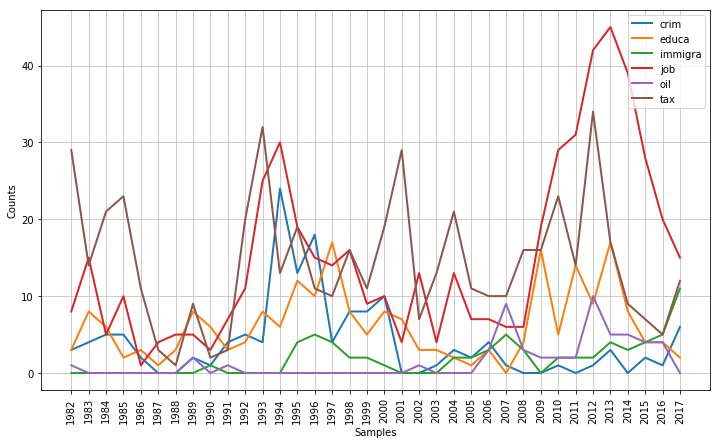

In [39]:
cfdd = nltk.ConditionalFreqDist(
(target, fileid[-8:-4])
for fileid in corpora.fileids()
for w in corpora.words(fileid)
for target in ["immigra", "tax", "crim", "job", "educa", "oil"]
if w.lower().startswith(target))

cfdd.plot()

In [75]:
#in what order do these topics show up? 
import codecs
f = codecs.open("1_repub.txt", "r", "utf-8-sig")
text = f.read()
text1 = text.split()
repub_speeches = nltk.Text(text1)




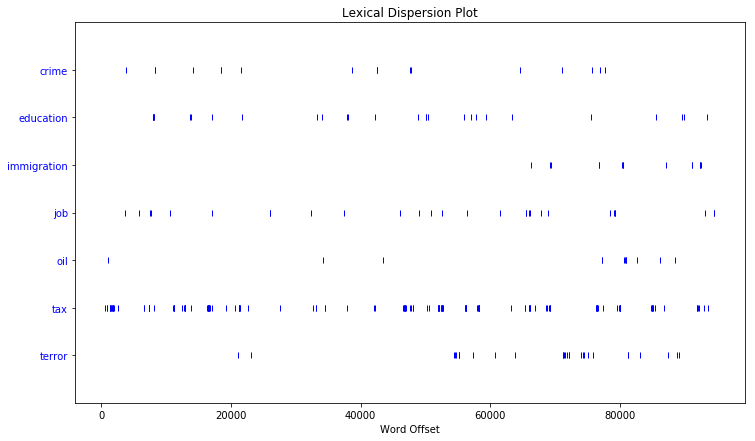

In [76]:
repub_speeches.dispersion_plot(["crime", "education", "immigration", "job", "oil", "tax", "terror"])